Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 1.0, 'Abnormal Areas on Skin (Edges)')

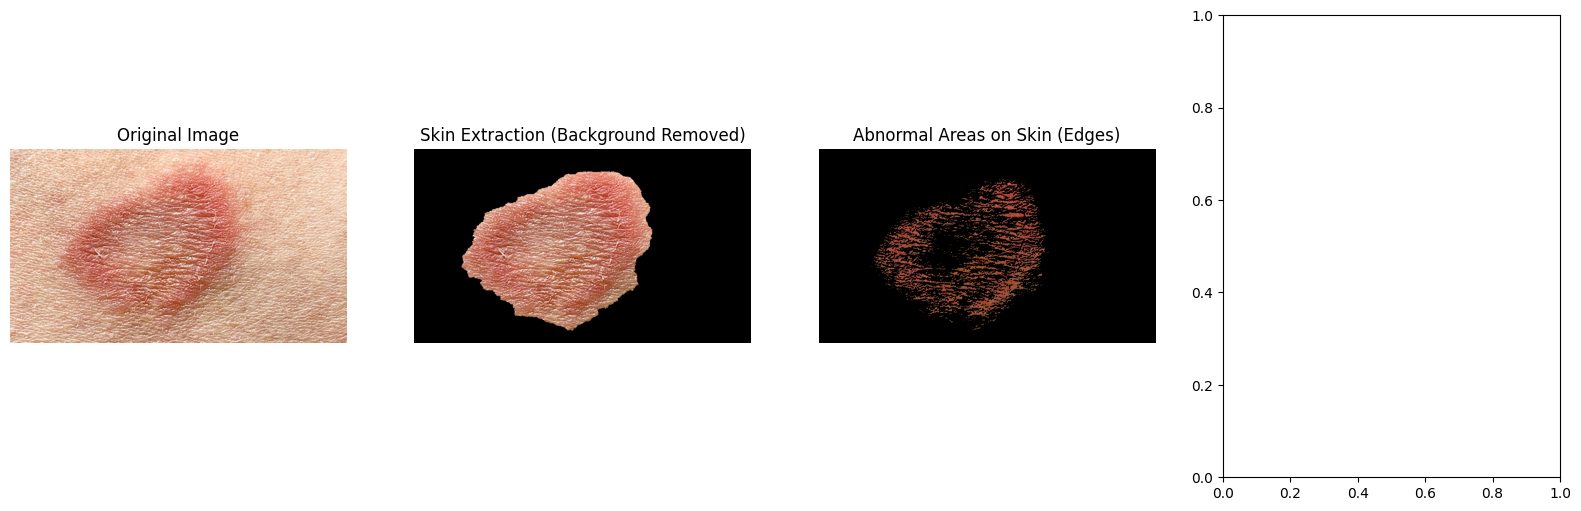

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 3: Load and display the image from Google Drive
# Replace 'path_to_image.jpg' with the actual path of your image on Google Drive
image_path = '/content/drive/MyDrive/skin disease/4560-ringworm.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 4: Preprocess the image (optional, may enhance segmentation)
# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(image_rgb, (15, 15), 0)

# Step 5: Segmentation using GrabCut to remove the background
# Initialize a mask for GrabCut
mask = np.zeros(image.shape[:2], np.uint8)

# Create background and foreground models
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Define a rectangle around the region of interest (adjust as needed)
rect = (50, 50, image.shape[1] - 50, image.shape[0] - 50)  # Adjust the rectangle as needed

# Apply GrabCut
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask - set sure foreground and background pixels
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
image_grabcut = image * mask2[:, :, np.newaxis]

# Step 6: Further segmentation for red areas using Color Thresholding
# Define a range for the red color specific to ringworm
lower_red = (100, 0, 0)
upper_red = (255, 100, 100)

# Create a mask for the red color on the GrabCut result
mask_red = cv2.inRange(cv2.cvtColor(image_grabcut, cv2.COLOR_BGR2RGB), lower_red, upper_red)

# Apply mask to the GrabCut result to extract the ringworm area
segmented = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_red)

# Step 7: Contour Detection and Drawing Bounding Boxes
# Find contours on the red mask
contours, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# Step 8: Display all results in a horizontal layout
fig, axs = plt.subplots(1, 4, figsize=(20, 6))
axs[0].imshow(image_rgb)
axs[0].axis('off')
axs[0].set_title('Original Image')

axs[1].imshow(cv2.cvtColor(image_grabcut, cv2.COLOR_BGR2RGB))
axs[1].axis('off')
axs[1].set_title('Skin Extraction (Background Removed)')

axs[2].imshow(segmented)
axs[2].axis('off')
axs[2].set_title('Abnormal Areas on Skin (Edges)')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Enter the full path of the image in Google Drive (e.g., /content/drive/MyDrive/dataset/image.jpg): /content/drive/MyDrive/skin disease/vitiligo-in-mumbai-india.jpg


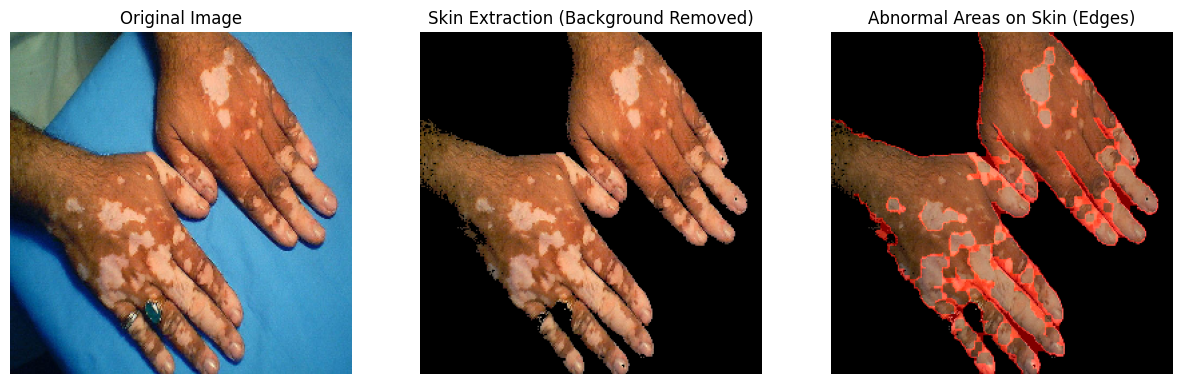

In [ ]:
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

def extract_skin_and_remove_background(image_path, edge_color=(0, 0, 255)):
    # Load the image
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, (256, 256))

    # Convert to HSV color space for better skin tone segmentation
    hsv_image = cv2.cvtColor(image_resized, cv2.COLOR_BGR2HSV)

    # Define skin color range in HSV
    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)

    # Mask for skin regions
    skin_mask = cv2.inRange(hsv_image, lower_skin, upper_skin)

    # Apply the mask to get only skin regions (removes background)
    skin_only = cv2.bitwise_and(image_resized, image_resized, mask=skin_mask)

    # Convert the skin-extracted image to grayscale
    gray_skin = cv2.cvtColor(skin_only, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred_skin = cv2.GaussianBlur(gray_skin, (5, 5), 0)

    # Edge detection on the skin areas
    edges = cv2.Canny(blurred_skin, threshold1=100, threshold2=200)

    # Morphological operations to refine edges and remove small noise
    kernel = np.ones((5, 5), np.uint8)
    edges_cleaned = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Create a color mask for the edges
    colored_edges = np.zeros_like(image_resized)
    colored_edges[edges_cleaned != 0] = edge_color  # Set edge pixels to the desired color

    # Overlay the colored edges on the skin-only image
    outlined_skin = cv2.addWeighted(skin_only, 0.8, colored_edges, 0.5, 0)

    # Display the results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(skin_only, cv2.COLOR_BGR2RGB))
    plt.title("Skin Extraction (Background Removed)")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(outlined_skin, cv2.COLOR_BGR2RGB))
    plt.title("Abnormal Areas on Skin (Edges)")
    plt.axis("off")

    plt.show()

# Get user input for the image path
image_path = input("Enter the full path of the image in Google Drive (e.g., /content/drive/MyDrive/dataset/image.jpg): ")

# Call the function with the user-provided path and the chosen edge color
extract_skin_and_remove_background(image_path, edge_color=(0, 0, 255))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Enter the full path of the image in Google Drive (e.g., /content/drive/MyDrive/dataset/image.jpg): /content/drive/MyDrive/skin disease/acne.jpg


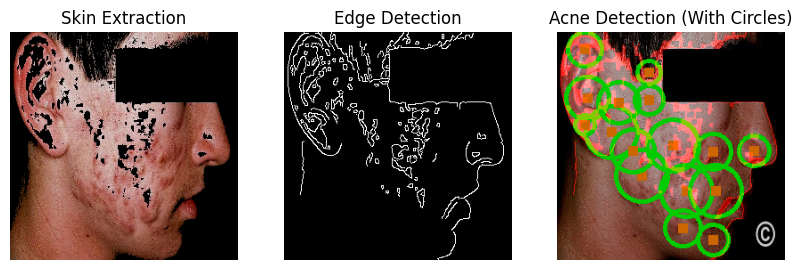

In [ ]:
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

def extract_skin_and_detect_acne(image_path, edge_color=(0, 0, 255)):
    # Load the image
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, (256, 256))

    # Convert to HSV color space for better skin tone segmentation
    hsv_image = cv2.cvtColor(image_resized, cv2.COLOR_BGR2HSV)

    # Define skin color range in HSV
    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)

    # Mask for skin regions
    skin_mask = cv2.inRange(hsv_image, lower_skin, upper_skin)

    # Apply the mask to get only skin regions
    skin = cv2.bitwise_and(image_resized, image_resized, mask=skin_mask)

    # Convert the skin-extracted image to grayscale
    gray_skin = cv2.cvtColor(skin, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred_skin = cv2.GaussianBlur(gray_skin, (5, 5), 0)

    # Edge detection on the skin areas
    edges = cv2.Canny(blurred_skin, threshold1=100, threshold2=200)

    # Morphological operations to remove small noise and refine edges
    kernel = np.ones((5, 5), np.uint8)
    edges_cleaned = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Detect round shapes (likely acne lesions) using HoughCircles
    circles = cv2.HoughCircles(blurred_skin, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=5, maxRadius=30)

    # Draw the detected circles (acne) on the original image
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(image_resized, (x, y), r, (0, 255, 0), 4)  # Green circle for acne lesions
            cv2.rectangle(image_resized, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)  # Small rectangle at the center

    # Create a color mask for the edges
    colored_edges = np.zeros_like(image_resized)
    colored_edges[edges_cleaned != 0] = edge_color  # Set edge pixels to the desired color

    # Combine the cleaned edges with the original image
    outlined_image = cv2.addWeighted(image_resized, 0.8, colored_edges, 0.5, 0)

    # Display the result
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(skin, cv2.COLOR_BGR2RGB))
    plt.title("Skin Extraction")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Edge Detection")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(outlined_image, cv2.COLOR_BGR2RGB))
    plt.title("Acne Detection (With Circles)")
    plt.axis("off")

    plt.show()

# Get user input for the image path
image_path = input("Enter the full path of the image in Google Drive (e.g., /content/drive/MyDrive/dataset/image.jpg): ")

# Call the function with the user-provided path and the chosen edge color
extract_skin_and_detect_acne(image_path, edge_color=(0, 0, 255))
